<h2><b>地震の深さとマグニチュードは関係あるの？</b></h2>

粟野翔







地震が起こったときに「震源の深さ○○m～」って言いますよね？

これと別に「マグニチュードは○○～」なんて言い方もされます。

ではこれらは関係あるのでしょうか？　それとも別々のもの？

では震源が深くなればなるほどマグニチュードが大きくなると予想しましょう。

本当にあっているか分析します！

    
  
  
  
  
  
では散布図を作っていきましょう。散布図はデータの関係性が視覚的に分かりやすいので使用しました。  

横軸が地震の深さ、縦軸がマグニチュードの大きさです。

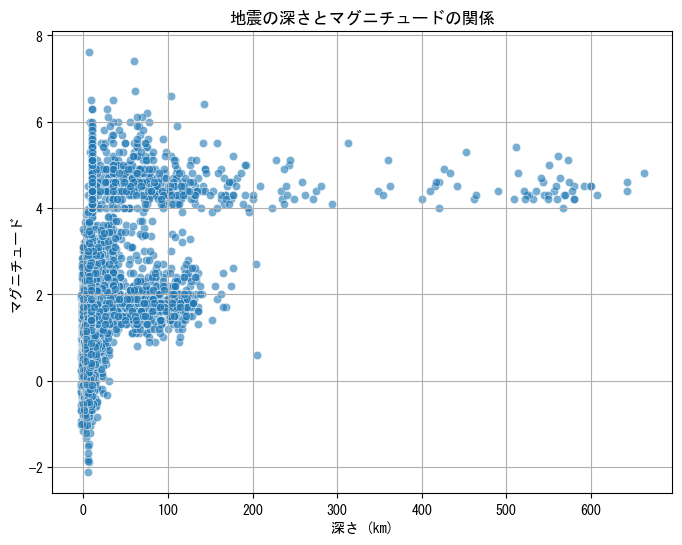

<h2><b>おお</b></h2>  

散布図から分かることは0~100ｍ地点で地震が多く発生しています。  
肝心の関係ですが0ｍ地点でもマグニチュード6以上の地震が発生しています。これにより  
震源が深くなればなるほどマグニチュードが大きくなるという仮説は間違っていると言えますね。  


しかし  
震源の深さが300ｍより深いところではマグニチュード4以上の地震しか発生していません。  
すこしは関係がありそうですね。

**数字で分析しよう！**  

今回はマグニチュードと深さの相関係数を調べます。


In [50]:
# セル 2: マグニチュードと深さの相関係数を計算
# 'mag' がマグニチュード, 'depth' が深さ（km）
corr = data['mag'].corr(data['depth'])
print(f"マグニチュードと深さの相関係数: {corr:.3f}")


マグニチュードと深さの相関係数: 0.388


実際に、震源の深さとマグニチュードの相関係数を求めたところ、値は 0.388 となりました。  

この結果は、震源が深くなるほどマグニチュードがやや大きくなる傾向があることを示しています。　　

ただし、0.4に満たない数値であるため、関係はそれほど強くなく、他の要因も影響していると考えられます。  

したがって、「震源の深さが大きいほど地震の規模も大きい」とは一概には言えませんが、一定の関連性があることは確かだと言えるでしょう。

<h2><b>他の要因として考えられるものは…？</b></h2>   
  
    
      
私は地震が起こる場所が関係しているのではないかと推測します。  
地震が起こった場所とマグニチュードの大きさを分析するためにヒートマップをつくります。



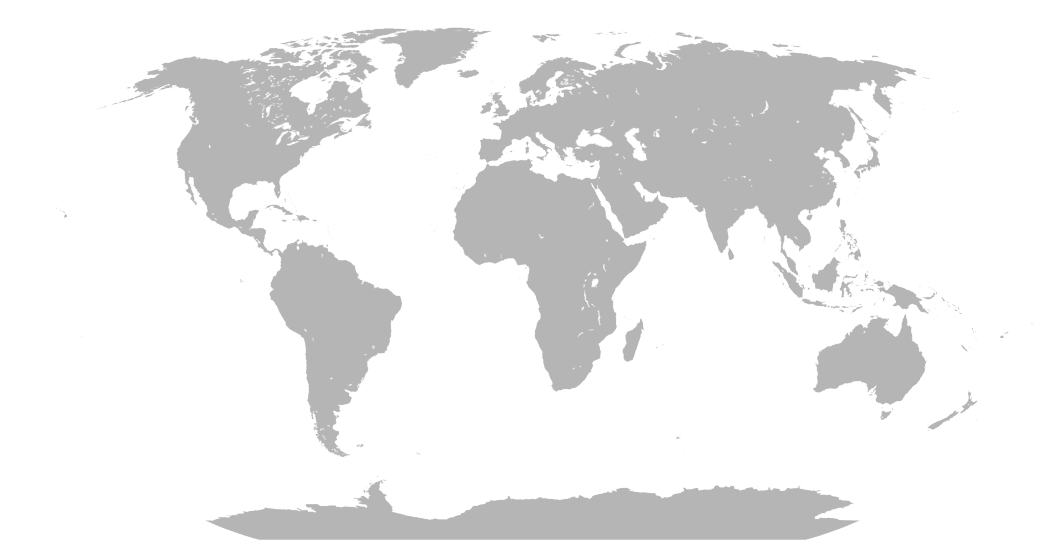

この世界地図はchatGPTに作ってもらいました  
これに地震が起こった位置とマグニチュードの大きさのヒートマップを作ると

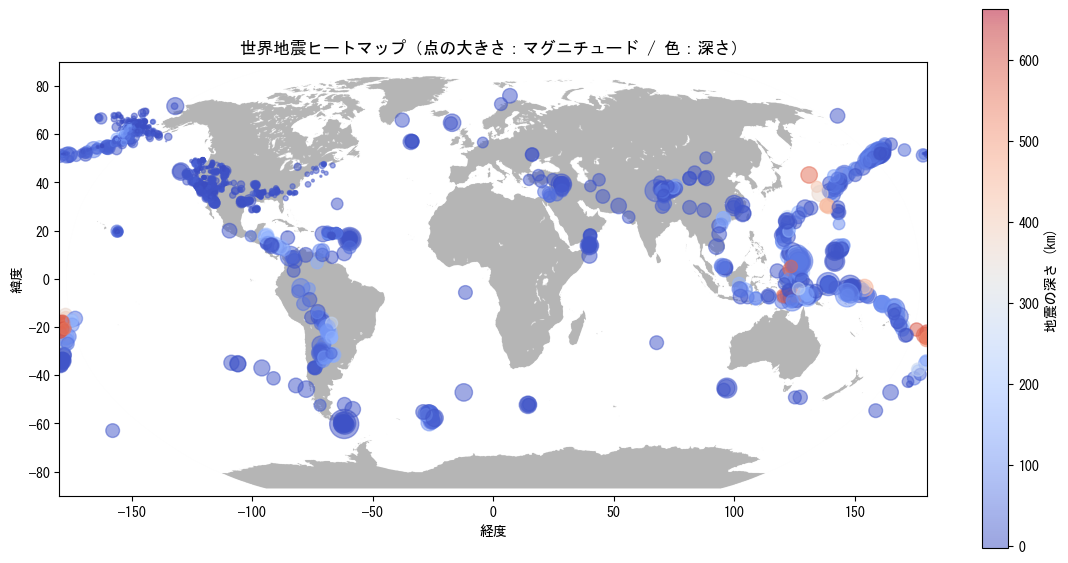

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 緯度・経度・マグニチュード・深さのデータ
lons = data['longitude']
lats = data['latitude']
mags = data['mag'].fillna(0)         # NaNを0に
depths = data['depth'].fillna(0)     # 深さもNaNを0に

# 点のサイズにマグニチュードを反映（強調したいので3乗）
sizes = mags**3

# 深さを色で表現（浅いほど赤、深いほど青）
colors = depths

plt.figure(figsize=(14,7))
plt.imshow(img, extent=[-180,180,-90,90])  # 画像を緯度経度に合わせる
plt.scatter(lons, lats, s=sizes, c=colors, cmap='coolwarm', alpha=0.5)

plt.colorbar(label='地震の深さ (km)')
plt.xlabel("経度")
plt.ylabel("緯度")
plt.title("世界地震ヒートマップ（点の大きさ：マグニチュード / 色：深さ）")
plt.show()



ヒートマップをつくれましたが今回は大きい地震に絞るのでマグニチュード5以上だけの  
ヒートマップを作成します。

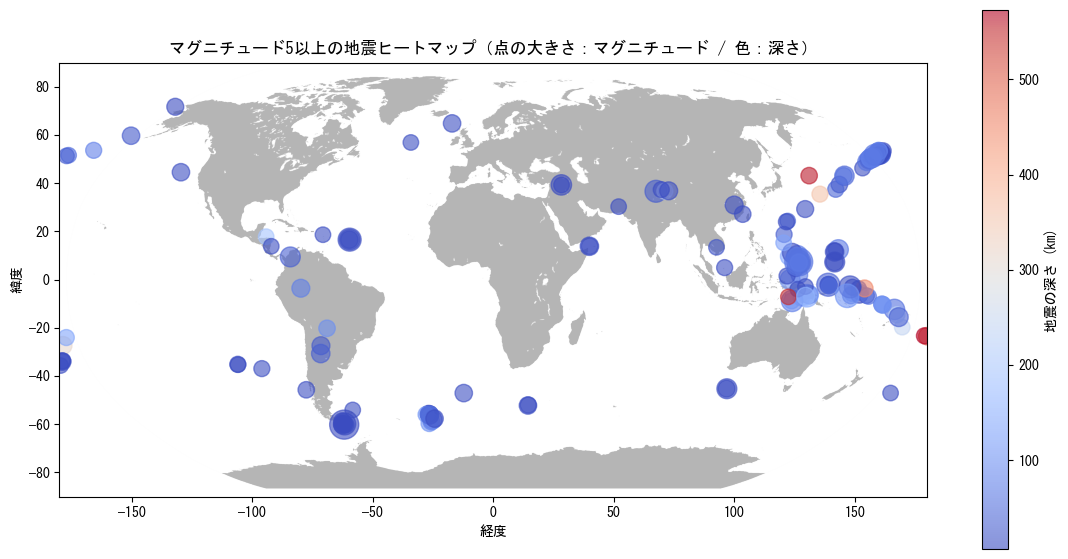

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 緯度・経度・マグニチュード・深さ
lons = data['longitude']
lats = data['latitude']
mags = data['mag'].fillna(0)
depths = data['depth'].fillna(0)

# マグニチュード5以上のみ抽出
mask = mags >= 5
lons = lons[mask]
lats = lats[mask]
mags = mags[mask]
depths = depths[mask]

# 点のサイズにマグニチュードを反映（強調のため3乗）
sizes = mags**3

# 深さを色で表現（浅い赤～深い青）
colors = depths

plt.figure(figsize=(14,7))
plt.imshow(img, extent=[-180,180,-90,90])  # 画像を緯度経度に合わせる
plt.scatter(lons, lats, s=sizes, c=colors, cmap='coolwarm', alpha=0.6)

plt.colorbar(label='地震の深さ (km)')
plt.xlabel("経度")
plt.ylabel("緯度")
plt.title("マグニチュード5以上の地震ヒートマップ（点の大きさ：マグニチュード / 色：深さ）")
plt.show()


このヒートマップは何を示しているのか、まだ分からないのでさらに分析します。  
地震の発生には地球のプレートが大きく関係していると思うのでプレートとともに分析します。

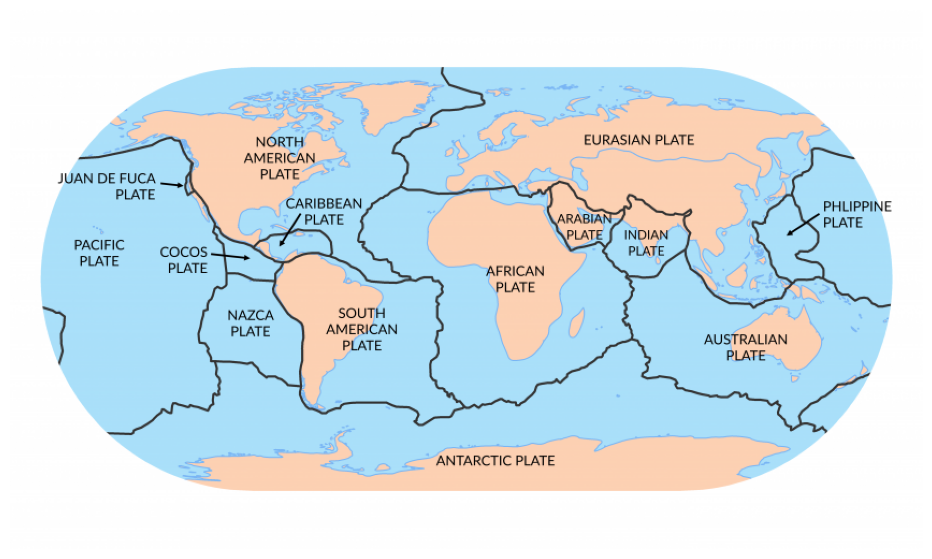

In [51]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像を読み込む
img = mpimg.imread('plate_tectonics.png')

# 表示
plt.figure(figsize=(14,7))
plt.imshow(img)
plt.axis('off')  # 軸を非表示
plt.show()


このプレートの画像もchatGPTに作ってもらいました  
これに先程のヒートマップを重ねます。

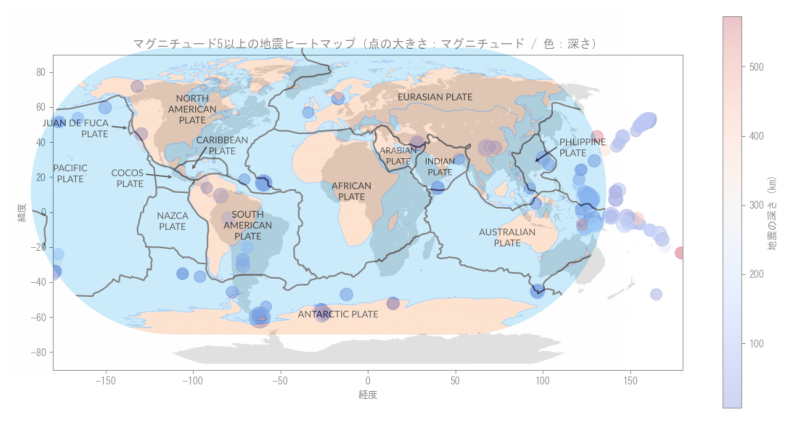

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像を読み込む
base = mpimg.imread("plate_tectonics.png")  # 下の画像（プレート図）
overlay = mpimg.imread("Heatmap.png")       # 上の画像（ヒートマップ）

# 図を作成
plt.figure(figsize=(10, 6))

# 下の画像（ベース）を表示
plt.imshow(base)

# 上の画像（透過して重ねる）
plt.imshow(overlay, alpha=0.4)  # 透明度 0.4（0～1で調整）

# 軸を非表示
plt.axis('off')

# 表示
plt.show()


かなりずれてしまいました。  

今回は私がプレートの境目を描いてヒートマップに重ねます。

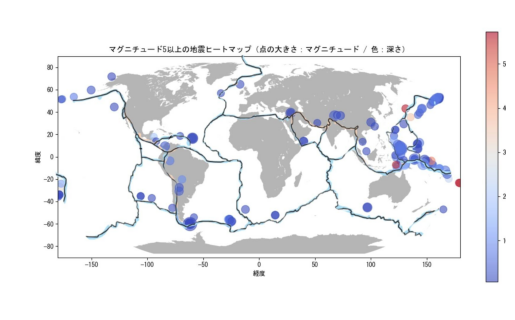

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像ファイルを読み込む
img = mpimg.imread("Heatnap_2.png")

# 画像を表示する
plt.imshow(img)
plt.axis("off")  # 軸（枠）を消す
plt.show()



ほとんどのマグニチュードが大きい地震はプレートの境目で起こっていることが分かります。  
これがマグニチュードの大きさと地震の位置には関係があるといえるでしょう。  



<h2><b>感想</b></h2>   
今回は地震の深さとマグニチュードの関係性を調べてみました。散布図と相関係数、ヒートマップを作って分析しました。散布図を作って分かったことはマグニチュードが大きい地震は震源の深さに関わらずどこでも起こることです。散布図を見てわかることは主観が少し入ってしまうので客観的なデータとしてマグニチュードの大きさと震源の深さの相関係数を調べました。弱めの正の相関があることが分かりました。少しは震源が深くなればなるほどマグニチュードが大きい地震が起こることが分りました。

今回の反省点はヒートマップとプレートの関係を分析したところです。ChatGPTにヒートマップと同じ縮尺のプレート図を作らせようとしたのですが、なかなかうまくいきませんでした。また、Heatmap_2.pngをHeatnap_2.pngと間違えて作ってしまい無限にエラーが出ていました。スペル間違いには気を付けていきたいです。
